<a href="https://colab.research.google.com/github/Nehueiy/Elevvo-Projects/blob/main/forest_cover_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
df = pd.read_csv(url, compression='gzip', header=None)

In [3]:
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area_{i}' for i in range(1, 5)] + [f'Soil_Type_{i}' for i in range(1, 41)] + ['Cover_Type']
df.columns = columns

In [4]:
df_sampled = df.sample(n=30000, random_state=42)
X = df_sampled.drop('Cover_Type', axis=1)
y = df_sampled['Cover_Type']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [7]:
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)


In [8]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [9]:
print("🌲 Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("🌳 Decision Tree Report:\n", classification_report(y_test, y_pred_dt))


🌲 Random Forest Report:
               precision    recall  f1-score   support

           1       0.83      0.84      0.84      2213
           2       0.88      0.82      0.85      2912
           3       0.78      0.87      0.82       366
           4       0.69      0.93      0.79        27
           5       0.45      0.79      0.57        95
           6       0.62      0.69      0.65       180
           7       0.81      0.91      0.85       207

    accuracy                           0.83      6000
   macro avg       0.72      0.83      0.77      6000
weighted avg       0.84      0.83      0.83      6000

🌳 Decision Tree Report:
               precision    recall  f1-score   support

           1       0.78      0.77      0.78      2213
           2       0.83      0.77      0.80      2912
           3       0.75      0.84      0.80       366
           4       0.71      0.74      0.73        27
           5       0.35      0.75      0.48        95
           6       0.57     

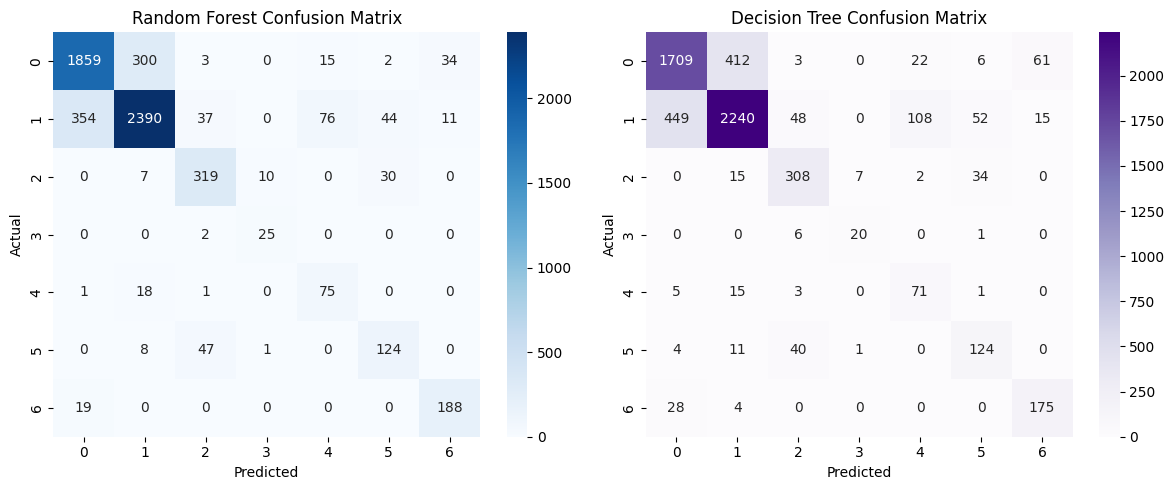

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted"), plt.ylabel("Actual")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted"), plt.ylabel("Actual")
plt.tight_layout()
plt.show()


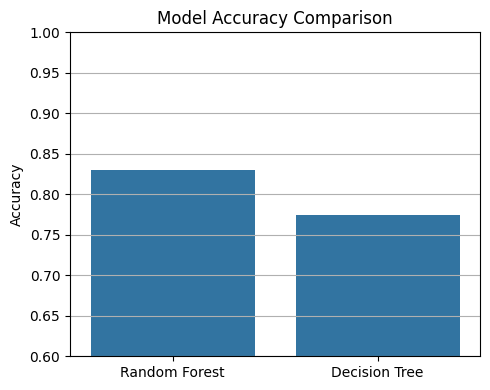

✅ Random Forest Accuracy: 0.8300
✅ Decision Tree Accuracy: 0.7745


In [12]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_dt = accuracy_score(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.barplot(x=["Random Forest", "Decision Tree"], y=[acc_rf, acc_dt])
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(f"✅ Random Forest Accuracy: {acc_rf:.4f}")
print(f"✅ Decision Tree Accuracy: {acc_dt:.4f}")



In [13]:
sample_input = X_test.iloc[[0]]
print("\n🌲 Sample Prediction:")
print(f"Random Forest ➜ Cover Type {rf.predict(sample_input)[0]}")
print(f"Decision Tree ➜ Cover Type {dt.predict(sample_input)[0]}")


🌲 Sample Prediction:
Random Forest ➜ Cover Type 5
Decision Tree ➜ Cover Type 5
